In [136]:
import pandas as pd
import numpy as np



In [137]:
df_pant = pd.read_excel('/home/cowmed14/Documentos/repositorios/lotes-405/data/cowmed-batch-30-panting-hours-chart..xlsx')
df_pant.rename(columns={'-':'date'}, inplace=True)
df_pant['date'] = df_pant['date'].str.strip()
df_pant['date'] = pd.to_datetime(df_pant['date'], format='%d/%m/%Y %H')

print(df_pant.shape)
print(df_pant.head())
print(df_pant.columns)
print(df_pant.dtypes)

(99, 4)
                 date  Horas ofegantes %  Média 7 dias  Max. horas ofegantes
0 2023-08-01 23:00:00              44.44     35.879630                    25
1 2023-08-02 23:00:00              55.56     39.583333                    25
2 2023-08-03 23:00:00              59.72     43.055556                    25
3 2023-08-04 23:00:00              54.17     44.907407                    25
4 2023-08-05 23:00:00              54.17     48.379630                    25
Index(['date', 'Horas ofegantes %', 'Média 7 dias', 'Max. horas ofegantes'], dtype='object')
date                    datetime64[ns]
Horas ofegantes %              float64
Média 7 dias                   float64
Max. horas ofegantes             int64
dtype: object


In [138]:
df_prod = pd.read_excel('/home/cowmed14/Documentos/repositorios/lotes-405/data/cowmed-batch-30-production..xlsx')
df_prod.drop(columns=['Tendência'], inplace=True)
df_prod.rename(columns={'-':'date'}, inplace=True)

df_prod['date'] = df_prod['date'].str.strip()
df_prod['date'] = pd.to_datetime(df_prod['date'], format='%d/%m/%Y %H')


print(df_prod.shape)
print(df_prod.head())
print(df_prod.columns)
print(df_prod.dtypes)

(99, 6)
                 date  Ruminação  Atividade   Ócio  Ofegação  \
0 2023-08-01 23:00:00      413.0      196.0  600.0     232.0   
1 2023-08-02 23:00:00      415.0      180.0  603.0     242.0   
2 2023-08-03 23:00:00      402.0      190.0  619.0     228.0   
3 2023-08-04 23:00:00      419.0      190.0  604.0     226.0   
4 2023-08-05 23:00:00      400.0      183.0  623.0     235.0   

   Produção leiteira  
0              25.38  
1              34.81  
2              31.48  
3              31.10  
4              28.38  
Index(['date', 'Ruminação', 'Atividade', 'Ócio', 'Ofegação',
       'Produção leiteira'],
      dtype='object')
date                 datetime64[ns]
Ruminação                   float64
Atividade                   float64
Ócio                        float64
Ofegação                    float64
Produção leiteira           float64
dtype: object


In [139]:
df_ref = pd.read_excel('/home/cowmed14/Documentos/repositorios/lotes-405/data/cowmed-batch-meals-graph-panting-hours..xlsx')
df_ref.rename(columns={'-':'date'}, inplace=True)
df_ref['date'] = pd.to_datetime(df_ref['date'])
print(df_ref.shape)
print(df_ref.head())
print(df_ref.columns)
print(df_ref.dtypes)


(99, 5)
                 date  Refeições  Média 7 dias  Min. refeições  \
0 2023-08-01 23:00:00       5.98          6.88               7   
1 2023-08-02 23:00:00       5.94          6.72               7   
2 2023-08-03 23:00:00       5.96          6.55               7   
3 2023-08-04 23:00:00       6.04          6.39               7   
4 2023-08-05 23:00:00       5.72          6.18               7   

   Horas ofegantes %  
0              44.44  
1              55.56  
2              59.72  
3              54.17  
4              54.17  
Index(['date', 'Refeições', 'Média 7 dias', 'Min. refeições',
       'Horas ofegantes %'],
      dtype='object')
date                 datetime64[ns]
Refeições                   float64
Média 7 dias                float64
Min. refeições                int64
Horas ofegantes %           float64
dtype: object


In [144]:
periods = {'2023-08-01 23:00:00': '2023-08-15 23:00:00', '2023-08-16 23:00:00': '2023-08-31 23:00:00',
           '2023-09-01 23:00:00': '2023-09-15 23:00:00', '2023-09-16 23:00:00': '2023-09-30 23:00:00',
           '2023-10-01 23:00:00': '2023-10-15 23:00:00', '2023-10-16 23:00:00': '2023-10-31 23:00:00',
           '2023-11-01 23:00:00': '2023-11-07 23:00:00'
}
csv_dict = {}
df_final = pd.DataFrame()
for start_date, end_date in periods.items():
    rum_mean = round(df_prod.loc[(df_prod['date'] >= start_date) & (df_prod['date'] <= end_date), 'Ruminação'].mean(),0)
    atv_mean = round(df_prod.loc[(df_prod['date'] >= start_date) & (df_prod['date'] <= end_date), 'Atividade'].mean(),0)
    leis_mean = round(df_prod.loc[(df_prod['date'] >= start_date) & (df_prod['date'] <= end_date), 'Ócio'].mean(),0)
    pan_mean = round(df_prod.loc[(df_prod['date'] >= start_date) & (df_prod['date'] <= end_date), 'Ofegação'].mean(),0)
    prod_mean = round(df_prod.loc[(df_prod['date'] >= start_date) & (df_prod['date'] <= end_date), 'Produção leiteira'].mean(),0)
    ref_mean = round(df_ref.loc[(df_ref['date'] >= start_date) & (df_ref['date'] <= end_date), 'Refeições'].mean(),0)
    pant_mean = round(df_pant.loc[(df_pant['date'] >= start_date) & (df_pant['date'] <= end_date), 'Horas ofegantes %'].mean(),0) 
    csv_dict[start_date[5:10]] = [rum_mean, atv_mean, leis_mean, pan_mean, prod_mean, ref_mean, pant_mean]
    print(f'start_date: {start_date[5:10]}, end_date: {end_date[5:10]}, rum_mean: {rum_mean}, atv_mean: {atv_mean}, leis_mean: {leis_mean}, pan_mean: {pan_mean}, prod_mean: {prod_mean}, ref_mean: {ref_mean}, pant_mean: {pant_mean}')

df_final = pd.DataFrame.from_dict(csv_dict, orient='columns')
df_final.replace(np.nan, 0, inplace=True)
print(df_final.head())

for coluna in df_final.columns:
    df_final[coluna] = df_final[coluna].astype(int).round(0)

df_final.to_csv('csva.csv')
print(df_final.head())

start_date: 08-01, end_date: 08-15, rum_mean: 406.0, atv_mean: 188.0, leis_mean: 616.0, pan_mean: 231.0, prod_mean: 27.0, ref_mean: 6.0, pant_mean: 52.0
start_date: 08-16, end_date: 08-31, rum_mean: 404.0, atv_mean: 215.0, leis_mean: 610.0, pan_mean: 211.0, prod_mean: 29.0, ref_mean: 7.0, pant_mean: 26.0
start_date: 09-01, end_date: 09-15, rum_mean: 400.0, atv_mean: 233.0, leis_mean: 602.0, pan_mean: 205.0, prod_mean: 33.0, ref_mean: 7.0, pant_mean: 16.0
start_date: 09-16, end_date: 09-30, rum_mean: 462.0, atv_mean: 237.0, leis_mean: 545.0, pan_mean: 196.0, prod_mean: 35.0, ref_mean: 8.0, pant_mean: 9.0
start_date: 10-01, end_date: 10-15, rum_mean: 404.0, atv_mean: 216.0, leis_mean: 615.0, pan_mean: 205.0, prod_mean: 28.0, ref_mean: 7.0, pant_mean: 21.0
start_date: 10-16, end_date: 10-31, rum_mean: 424.0, atv_mean: 236.0, leis_mean: 589.0, pan_mean: 191.0, prod_mean: 27.0, ref_mean: 7.0, pant_mean: 5.0
start_date: 11-01, end_date: 11-07, rum_mean: 408.0, atv_mean: 245.0, leis_mean: 597

In [145]:
print(csv_dict)

{'08-01': [406.0, 188.0, 616.0, 231.0, 27.0, 6.0, 52.0], '08-16': [404.0, 215.0, 610.0, 211.0, 29.0, 7.0, 26.0], '09-01': [400.0, 233.0, 602.0, 205.0, 33.0, 7.0, 16.0], '09-16': [462.0, 237.0, 545.0, 196.0, 35.0, 8.0, 9.0], '10-01': [404.0, 216.0, 615.0, 205.0, 28.0, 7.0, 21.0], '10-16': [424.0, 236.0, 589.0, 191.0, 27.0, 7.0, 5.0], '11-01': [408.0, 245.0, 597.0, 189.0, nan, 8.0, 5.0]}


('01-08', '16-08', '01-09', '16-09', '01-10', '16-10', '01-11')
[0 1 2 3 4 5 6]
0 (406.0, 188.0, 616.0, 231.0, 27.0, 6.0, 52.0)
1 (404.0, 215.0, 610.0, 211.0, 29.0, 7.0, 26.0)
2 (400.0, 233.0, 602.0, 205.0, 33.0, 7.0, 16.0)
3 (462.0, 237.0, 545.0, 196.0, 35.0, 8.0, 9.0)
4 (404.0, 216.0, 615.0, 205.0, 28.0, 7.0, 21.0)
5 (424.0, 236.0, 589.0, 191.0, 27.0, 7.0, 5.0)
6 (408.0, 245.0, 597.0, 189.0, nan, 8.0, 5.0)


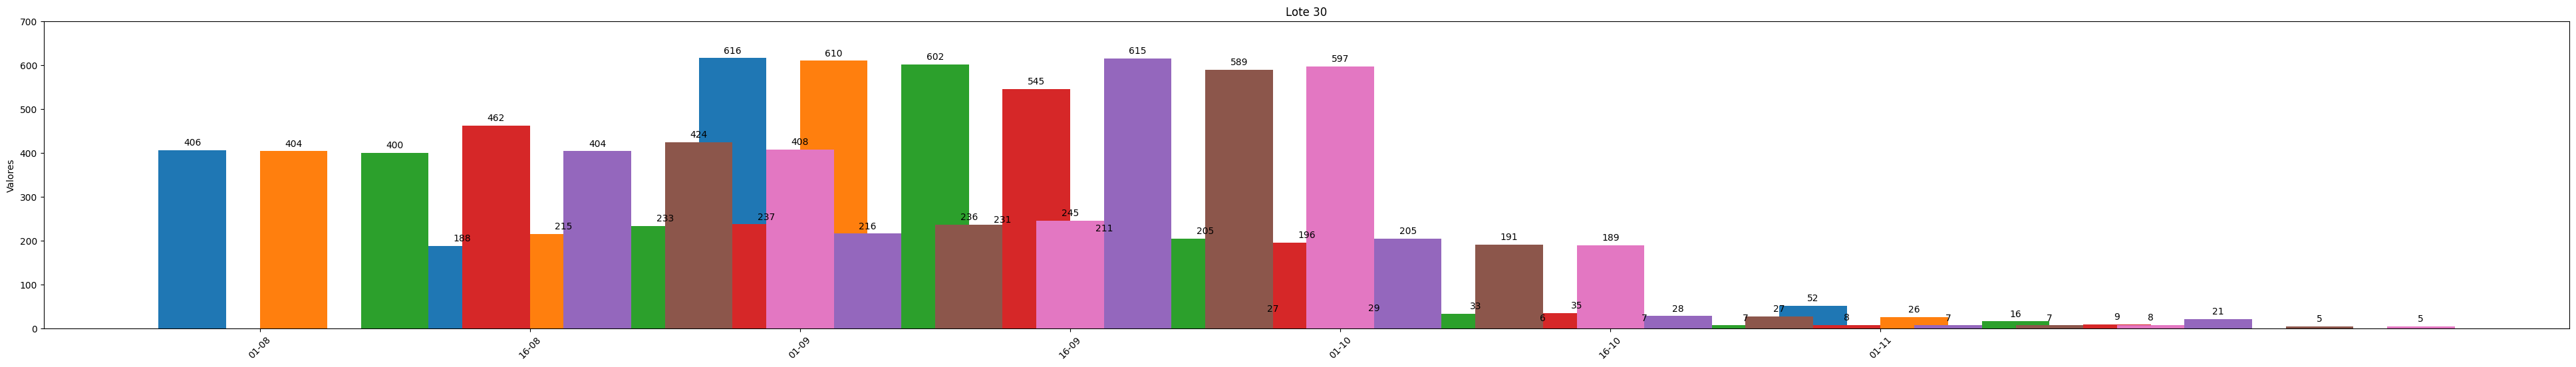

In [213]:
import matplotlib.pyplot as plt
dates = list(csv_dict.keys())
values = list(csv_dict.values())

dates = [data.split('-')[1] + '-' + data.split('-')[0] for data in dates]
tuple_dates = ()
for date in dates:
    tuple_dates += (date,)
dates = tuple_dates
print(dates)

i = 0
dict_plot = {}
for value in values:
    tuple_ = ()
    for value_ in value:
        tuple_ += (value_,)
    
    dict_plot[i] = tuple_
    i+=1

width = 0.25  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(figsize=(7*7, 6))

x = np.arange(len(dates))  # the label locations
print(x)

for attribute, measurement in dict_plot.items():
    print(attribute, measurement)
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement ,width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1.5


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Valores')
ax.set_title('Lote 30')

ax.set_xticks(x + width, dates)
ax.set_xticklabels(dates, rotation=45)

ax.set_ylim(0, 700)

plt.show()


    

    
